In [49]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
raw_data = pd.read_csv("data/no2019data.csv")
raw_data.State = pd.factorize(raw_data.State)[0]
raw_data = raw_data.apply(pd.to_numeric, errors='coerce')
X, y = np.delete(raw_data.values, [0,1], 1), raw_data.values[:, 1]
print(X[0, :], y[0])
print(X.shape)

[1.845e+03 2.940e+02 7.397e+05 7.000e+00] 309.0
(561, 4)


In [50]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(max_depth=None, n_estimators=5000)
scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='explained_variance')
print(np.mean(scores), np.std(scores))

0.9499964788431072 0.05755373992191636


In [52]:
forest.fit(X_train, y_train)
print(forest.score(X_test, y_test))

0.9890627630152569


In [55]:
# Making predictions
forest.fit(X, y)
yearInputs = pd.read_csv("data/2018withUnemployment.csv")
states = yearInputs.State
yearData = yearInputs.loc[:, ("overall", 'unsheltered', 'population', 'unemployment')].values
outputs = forest.predict(yearData)
result = pd.DataFrame(np.vstack((states, yearInputs.loc[:, "unsheltered"].values, outputs)).T, columns=["State", "PreviousYear", "Prediction"])
result.to_csv("results/2019predictions.csv")
result.tail()



,State,PreviousYear,Prediction
46,VT,82,125.34
47,WA,10621,10150.1
48,WI,382,418.705
49,WV,183,177.256
50,WY,199,284.375


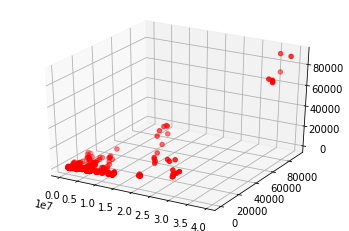

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 2], X_train[:, 1], y_train, c='r', marker='o')
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
scores = cross_val_score(linreg, X_train, y_train, cv=10, scoring='explained_variance')
print(scores)
print(np.mean(scores), np.std(scores))

[0.99447773 0.99418771 0.97594912 0.9330104  0.98304063 0.9576879
 0.99464114 0.99466371 0.99044407 0.89958643]
0.9717688847104918 0.030772875603262893
